#### Importing necessary libraries

In [5]:
# Libraries importation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# reading the csv file
supply_chain = pd.read_csv('Supply Chain.csv')

In [3]:
# understanding the dataset
supply_chain.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Location,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,Mumbai,215,29,46.279879,Pending,0.002264,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,Mumbai,517,30,33.616769,Pending,0.048541,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,Mumbai,971,27,30.688019,Pending,0.045806,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,Kolkata,937,18,35.624741,Fail,0.047466,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,Delhi,414,3,92.065161,Fail,0.031456,Air,Route A,923.440632


In [4]:
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             401 non-null    object 
 1   SKU                      401 non-null    object 
 2   Price                    401 non-null    float64
 3   Availability             401 non-null    int64  
 4   Number of products sold  401 non-null    int64  
 5   Revenue generated        401 non-null    float64
 6   Customer demographics    401 non-null    object 
 7   Stock levels             401 non-null    int64  
 8   Lead times               401 non-null    int64  
 9   Order quantities         401 non-null    int64  
 10  Shipping times           401 non-null    int64  
 11  Shipping carriers        401 non-null    object 
 12  Shipping costs           401 non-null    float64
 13  Supplier name            401 non-null    object 
 14  Location                 4

In [5]:
supply_chain['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [6]:
supply_chain['Shipping carriers'].unique()

array(['Carrier B', 'Carrier A', 'Carrier C'], dtype=object)

In [7]:
supply_chain['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [8]:
supply_chain['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [9]:
supply_chain['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [10]:
supply_chain['Shipping costs'].sum()

2220.570652556

In [11]:
# checking the rows and colums of the dataset
supply_chain.shape

(401, 23)

In [12]:
supply_chain.duplicated().sum()

0

In [13]:
# Checking the columns
supply_chain.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

In [14]:
supply_chain.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### No missing data detected in the dataset 

In [15]:
# checking the statistical distribution of the dataset
supply_chain.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,49.509981,48.321696,461.403990,5784.549778,47.788030,15.940150,49.244389,5.750623,5.537583,568.720698,14.738155,47.243766,0.022723,528.451511
std,31.026556,30.629377,302.371024,2724.467443,31.214219,8.750795,26.654645,2.710656,2.646557,262.321829,8.890656,28.841217,0.014572,257.498633
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,104.000000,1.000000,1.085069,0.000186,103.916248
25%,19.754605,22.000000,187.000000,2828.348746,17.000000,8.000000,26.000000,4.000000,3.404734,358.000000,7.000000,23.126364,0.010009,312.574274
50%,51.355791,43.000000,394.000000,6088.021480,48.000000,17.000000,52.000000,6.000000,5.288190,569.000000,14.000000,45.531364,0.021225,517.499974
75%,76.962994,75.000000,704.000000,8318.903195,73.000000,24.000000,71.000000,8.000000,7.577450,806.000000,23.000000,68.184919,0.035410,762.459182
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,985.000000,30.000000,99.466109,0.049393,997.413450


#### Data Analysis

In [17]:
Total_Revenue = supply_chain['Revenue generated'].sum()
Total_Revenue

2319604.460789

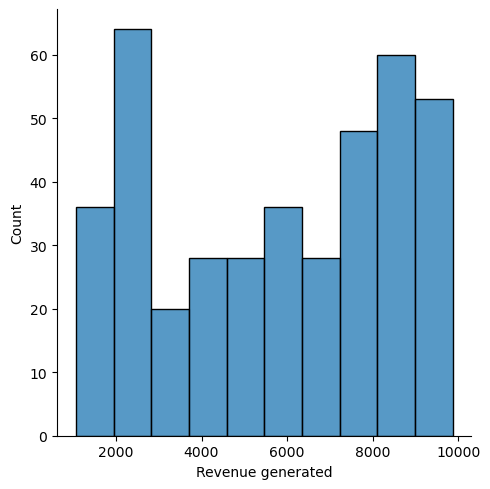

In [18]:
sns.displot(data= supply_chain, x ='Revenue generated', bins =10, kde= False)

In [19]:
Total_cost = supply_chain['Costs'].sum()
Total_cost

211909.05587060002

In [20]:
All_costs =supply_chain['Costs'] + supply_chain['Manufacturing costs']+ supply_chain['Shipping costs'].sum()
All_costs.sum()

1121302.637740648

In [21]:
Total_profit = Total_Revenue - All_costs.sum()
Total_profit

1198301.8230483523

In [22]:
Total_productSold = supply_chain['Number of products sold'].sum()
Total_productSold

185023

### Data Analysis Data Visualization

#### Analysing by Revenue

In [40]:
# grouping and analysing product type with Total Revenue
product_revenue = supply_chain.groupby('Product type')[ 'Total_Revenue'].sum()
product_revenue

Product type
cosmetics    2.412389e+08
haircare     3.177858e+08
skincare     3.711367e+08
Name: Total_Revenue, dtype: float64

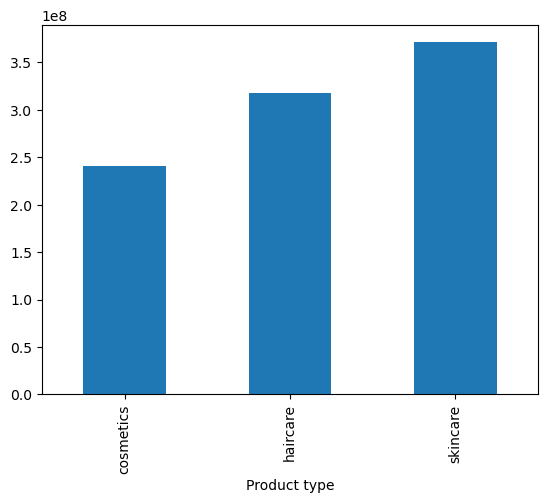

In [41]:
# Visualizing the analysis
product_revenue = supply_chain.groupby('Product type')[ 'Total_Revenue'].sum().plot(kind ='bar')


#### Skincare product ranks highest of the product type. The organisation sells more of skincare product

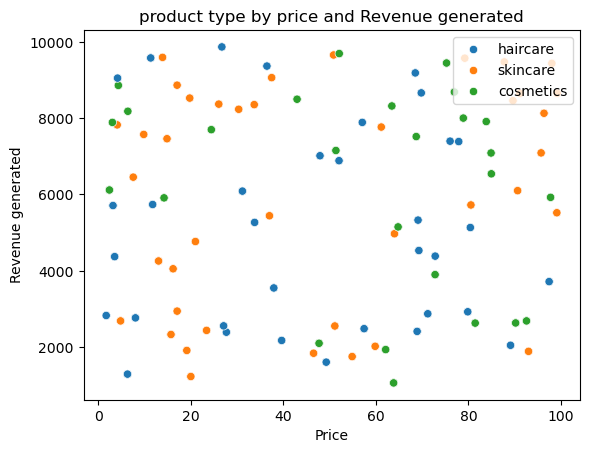

In [23]:
# Grouping price of product in terms of revenue
# Understanding the price of product by revenue generated made more purchase
sns.scatterplot(data= supply_chain, x='Price', y='Revenue generated', hue ='Product type')
plt.legend(loc = 'upper right')
plt.title('product type by price and Revenue generated')
plt.show()


#### Skincare generated a total of $3.71 which was the highest revenue from the product type

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\1428967517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = supply_chain, x= 'Location', y= 'Revenue generated', palette = 'viridis')


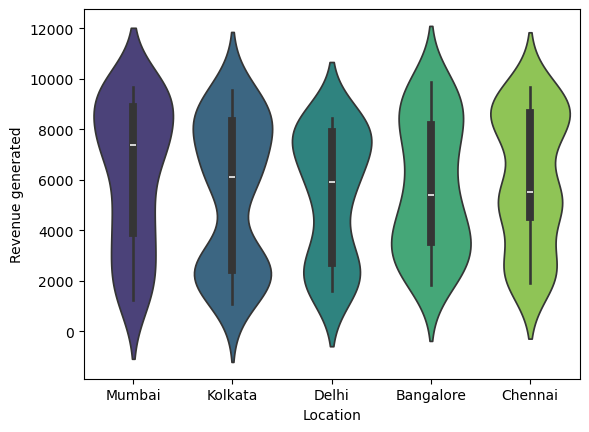

In [24]:
# Analysing Revenue generated by location using a violin plot
sns.violinplot(data = supply_chain, x= 'Location', y= 'Revenue generated', palette = 'viridis')
plt.title = (' Revenue generated by location')
plt.show()


#### Mumbai hace a wider distribution with highest rate of revenue generated

In [25]:
# using a pie chart to illustrate product sold by customer demography
customer_demography_revenue = supply_chain.groupby('Customer demographics')['Revenue generated'].sum()
customer_demography_revenue

Customer demographics
Female        646057.956484
Male          506537.577040
Non-binary    465463.206072
Unknown       701545.721193
Name: Revenue generated, dtype: float64

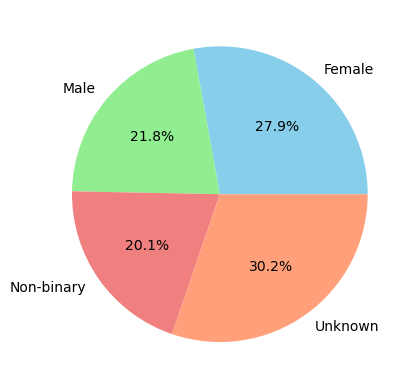

In [58]:
# Visualize customer_demography_revenue using pie chart
plt.pie (customer_demography_revenue, labels = customer_demography_revenue . index,  autopct='%1.1f%%', 
         colors=['Skyblue', 'lightgreen', 'lightcoral','lightsalmon'])
plt.title = ('Customer Demography by Revenue generated')
plt.show()


#### The unknown customer generated the highest revenue with a total of 30.2 % with a REvenue of above 70k

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\2615132551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = supply_chain, x= 'Supplier name', y= 'Revenue generated', palette = 'viridis')


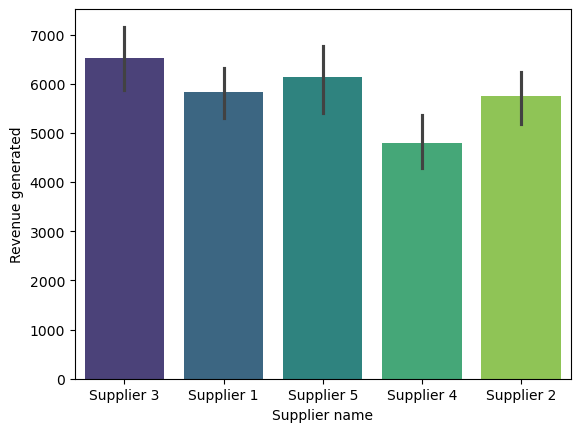

In [28]:
sns.barplot(data = supply_chain, x= 'Supplier name', y= 'Revenue generated', palette = 'viridis')
plt.title = (' Revenue generated by suppliers')
plt.show()

#### Supplier 3 generated the highest revenue

## Product Insight

In [29]:
# calculating the profit margin
profit_margin = Total_Revenue - All_costs/  Total_Revenue * 100
Avg_margin = profit_margin.mean()
Avg_margin

2319604.3402397437

In [30]:
# Estimating the overall order quantity
sum_order_quantity =supply_chain['Order quantities'].sum()
sum_order_quantity

19747

In [31]:
sum_stock_level =supply_chain['Stock levels'].sum()
sum_stock_level

19163

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\2402128875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=supply_chain, x = 'Product type', palette = 'viridis')


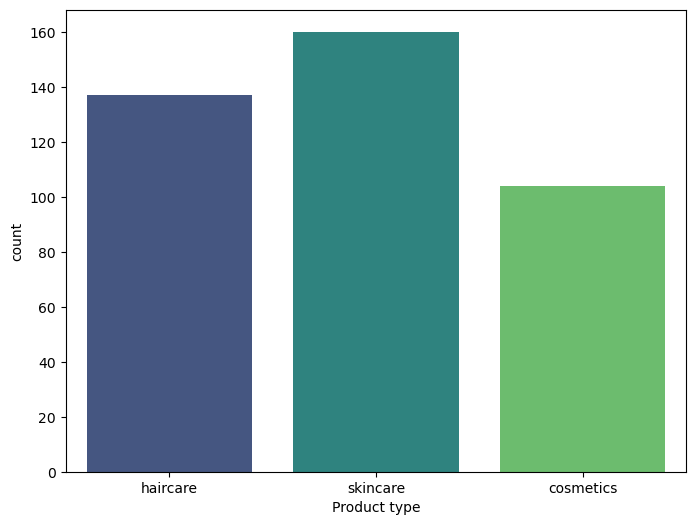

In [57]:
# checking the product type using a bar chart: use for categorical data
plt.figure(figsize =(8,6))
sns.countplot(data=supply_chain, x = 'Product type', palette = 'viridis')
plt.xlabel('Product type')
plt.ylabel('count')
plt.title=('Number of Product Type')
plt.show()


### Skincare has the highest volume of sales

In [33]:
# calculating product sold by each product type
product_sold = supply_chain.groupby('Product type')[ 'Number of products sold'].sum()
product_sold 

Product type
cosmetics    47028
haircare     55071
skincare     82924
Name: Number of products sold, dtype: int64

<Axes: xlabel='Product type'>

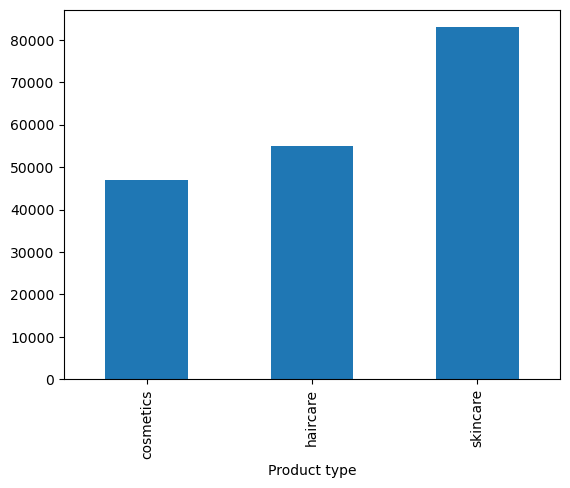

In [34]:
# Visualizing the product sold
product_sold = supply_chain.groupby('Product type')[ 'Number of products sold'].sum().plot(kind ='bar')
product_sold

#### skincare generated the highest revenue. the chart illlustrated that when the price was higher, skincare gave the highest volume of Revenue

In [35]:
product_quantityorder = supply_chain.groupby('Product type')['Order quantities'].sum()
product_quantityorder

Product type
cosmetics    5372
haircare     5979
skincare     8396
Name: Order quantities, dtype: int64

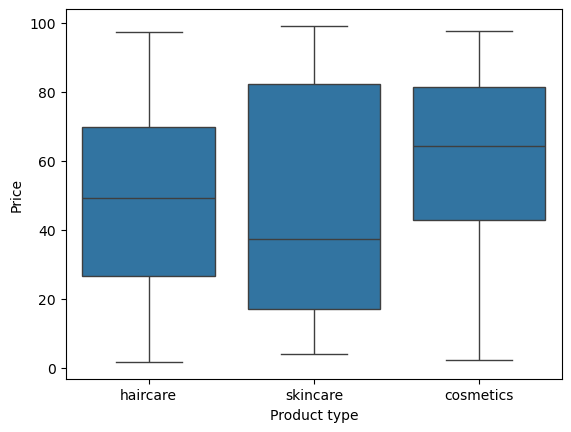

In [59]:
# calculating our product type by quantity order
sns.boxplot(data = supply_chain, x = 'Product type', y = 'Price')
plt.title = ('product type by price')
plt.show()

In [8]:
### The chart indicates a wide range of price in the skincare product, cosmetics has a product type of high prices.

In [66]:
Defect_product = supply_chain.groupby('Product type')['Defect rates'].mean().reset_index()
Defect_product

,Product type,Defect rates
0,cosmetics,0.019193
1,haircare,0.024676
2,skincare,0.023347


C:\Users\USER\AppData\Local\Temp\ipykernel_7488\2381399079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data= supply_chain,x ='Product type', y = 'Defect rates', palette = 'viridis')


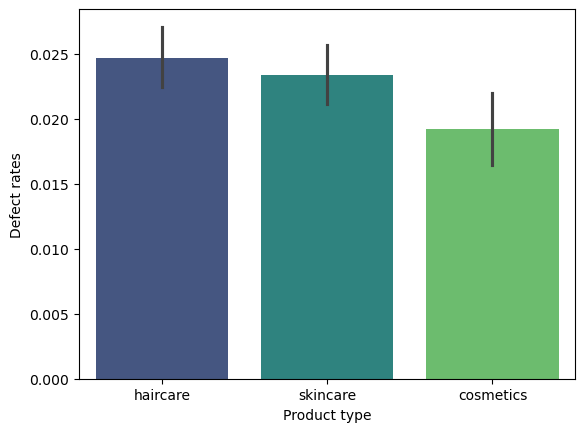

In [96]:
# analysing the defect rate of the product type
sns.barplot( data= supply_chain,x ='Product type', y = 'Defect rates', palette = 'viridis')
plt.title= ('Average defect rate')
plt.show()

### Hair care product has the highest defect rate of product

In [71]:
production_volume_product = supply_chain.groupby('Product type')['Production volumes'].sum()
production_volume_product

Product type
cosmetics    49844
haircare     80749
skincare     97464
Name: Production volumes, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\768912803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = supply_chain, x= 'Product type', y= 'Production volumes', palette = 'magma')


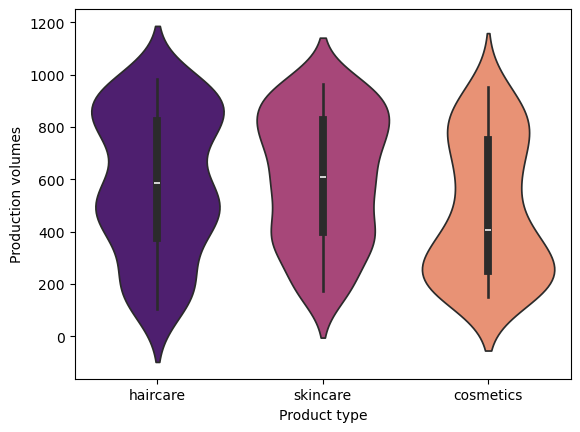

In [97]:
# Analysing production volume of the product type by location using a violin plot
sns.violinplot(data = supply_chain, x= 'Product type', y= 'Production volumes', palette = 'magma')
plt.title = ('production Volume of product')
plt.show()


### Skin care has more production volume. more skincare are produced

In [85]:
SKU_producttype = supply_chain.groupby('Product type')['Availability'].sum()
SKU_producttype

Product type
cosmetics    5328
haircare     5901
skincare     8148
Name: Availability, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\3465440809.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=supply_chain, x = 'Product type', y = 'Availability', palette = 'viridis')


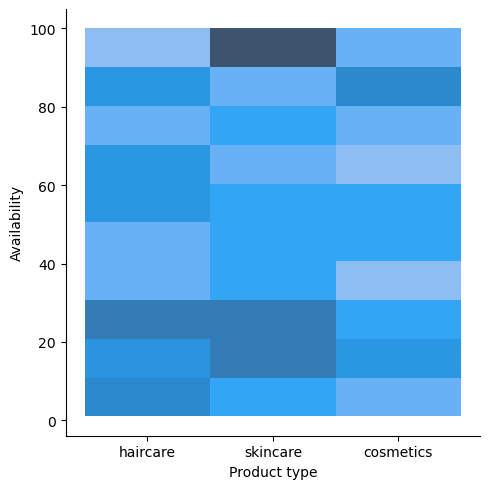

In [98]:
# Analysing availabiliry of the p[roduct type
sns.displot(data=supply_chain, x = 'Product type', y = 'Availability', palette = 'viridis')
plt.title=('Availability of product type')
plt.show()


In [ ]:
### Skin care indicated more availabity of product around 100days, while care shows a more even distribution

### Manufacturer / Supplier analysis and transportation

<Axes: xlabel='Product type'>

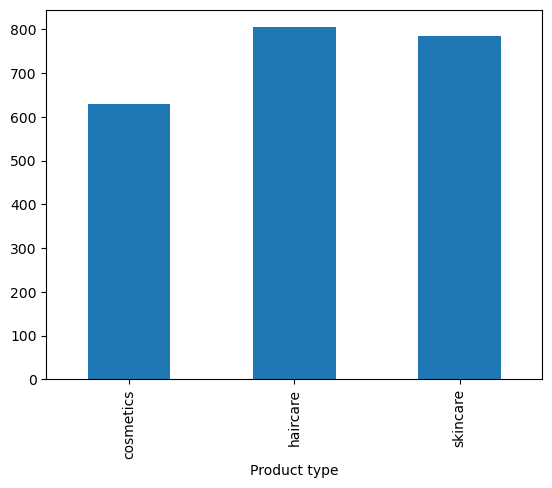

In [100]:
manufacturing_shippingcost = supply_chain.groupby('Product type')['Shipping costs'].sum().plot(kind ='bar')
manufacturing_shippingcost

In [ ]:
# The cost of shipping  haircare product is more than cost of other product

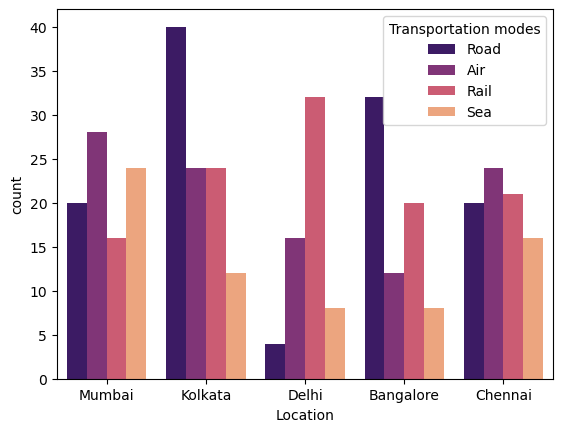

In [104]:
# Analysing location and transportation mode
sns.countplot( data= supply_chain,x ='Location', hue ='Transportation modes',palette = 'magma')
plt.title= ('Transportation for various location')
plt.show()

In [3]:
# analysing the product type by shipping and transportation mode
sns.barplot(data= supply_chain,x ='Transportation modes', y ='Shipping costs', hue ='Product type',palette = 'magma')
plt.title = ('product type for shipping cost and transportation mode')
plt.show()

NameError: name 'supply_chain' is not defined

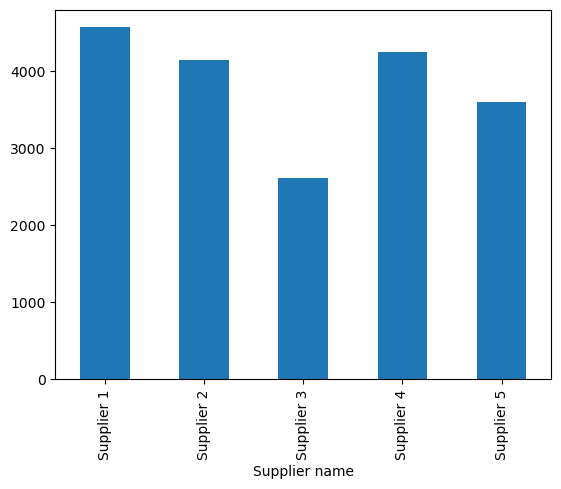

In [107]:
# Analysing supplier name and stocl level
stocklevel_supplier = supply_chain.groupby('Supplier name')['Stock levels'].sum().plot(kind ='bar')

### Supplier 1 has the highest stock available

In [119]:
# Analysing defect by  transportation mode
supply_chain['mean_defect'] = supply_chain['Defect rates'].mean()

supply_chain['mean_defect']

0      0.022723
1      0.022723
2      0.022723
3      0.022723
4      0.022723
         ...   
396    0.022723
397    0.022723
398    0.022723
399    0.022723
400    0.022723
Name: mean_defect, Length: 401, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\3984898678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = supply_chain, y= 'Defect rates', x= 'Transportation modes', palette = 'magma')


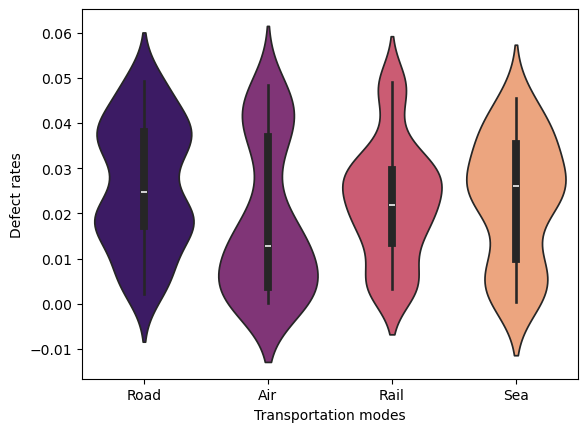

In [121]:
sns.violinplot(data = supply_chain, y= 'Defect rates', x= 'Transportation modes', palette = 'magma')
plt.title = ('production Volume of product')
plt.show()

### Road transportation has the highest defect rate, citical and high level product should be giving high consideration to avoid loss of customers

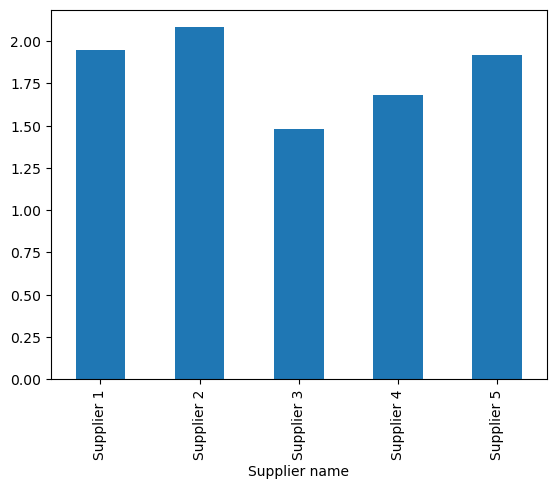

In [123]:
# Analysing supplier name and defect rate
stocklevel_supplier = supply_chain.groupby('Supplier name')['Defect rates'].sum().plot(kind ='bar')

#### Supplier 2 has the highest defect rate